# Diskritisasi

### penjelasan Diskritisasi

Secara sederhana, **diskritisasi** adalah proses mengubah data numerik yang kontinu (memiliki banyak kemungkinan nilai, seperti tinggi badan atau suhu) menjadi sejumlah kategori atau "wadah" (bins) yang terbatas dan diskrit.

**Analogi Sederhana:**
Bayangkan Anda memiliki daftar nilai ujian siswa dari 0 hingga 100. Nilai ini kontinu. Kemudian, Anda mengubahnya menjadi nilai huruf:
* Nilai 85 - 100 menjadi **'A'**
* Nilai 70 - 84.9 menjadi **'B'**
* Nilai 55 - 69.9 menjadi **'C'**

Proses mengubah nilai angka menjadi nilai huruf inilah yang disebut **diskritisasi**. Anda mengubah data yang memiliki banyak variasi menjadi beberapa kategori saja ('A', 'B', 'C').

Dalam proyek yang kita kerjakan, kita melakukan hal yang sama pada panjang dan lebar kelopak bunga (petal/sepal). Alih-alih menggunakan angka presisi seperti 5.1 cm, 4.9 cm, atau 7.0 cm, kita mengelompokkannya ke dalam kategori seperti 'A', 'B', 'C', dan 'D'.

**Tujuan Diskritisasi:**
1.  **Penyederhanaan:** Membuat data lebih mudah dipahami dan dianalisis.
2.  **Kompatibilitas Model:** Beberapa model machine learning, seperti *Categorical Naive Bayes* yang kita gunakan, secara khusus memerlukan input berupa data kategorikal.
3.  **Menangkap Hubungan Non-Linear:** Terkadang, hubungan antara fitur dan target tidak lurus (linear). Mengelompokkan data ke dalam kategori dapat membantu model menangkap pola yang lebih kompleks.
4.  **Mengurangi Dampak Outlier:** Nilai yang sangat ekstrem (outlier) akan masuk ke dalam kategori yang sama dengan nilai lain di ujung rentang, sehingga dampaknya tidak terlalu besar.

---

### Rumus Matematika di Balik Metode Diskritisasi

Tidak ada satu "rumus diskritisasi" tunggal. Rumusnya sangat bergantung pada **metode** yang dipilih. Berikut adalah dua metode populer beserta matematikanya:

#### 1. Equal Width Binning (Pembagian Berdasarkan Rentang Sama)

Ini adalah metode paling dasar di mana kita membagi rentang data menjadi `k` interval dengan lebar yang sama.

Rumus untuk menentukan lebar setiap interval (`w`) adalah:

$$w = \frac{\text{Nilai Maksimum} - \text{Nilai Minimum}}{k}$$

Di mana:
* `Nilai Maksimum` adalah data terbesar dalam fitur.
* `Nilai Minimum` adalah data terkecil dalam fitur.
* `k` adalah jumlah kategori/wadah yang kita inginkan.

Batas intervalnya kemudian adalah: `Minimum`, `Minimum + w`, `Minimum + 2w`, ..., `Maksimum`.

#### 2. KMeans Clustering (Metode yang Kita Gunakan)

Metode ini jauh lebih canggih. Alih-alih hanya memotong rentang data, KMeans secara aktif mencari "pengelompokan alami" dalam data. Tujuannya adalah untuk meminimalkan jarak antara setiap titik data dengan pusat klaster (disebut **centroid**) tempat ia berada.

Secara matematis, KMeans bertujuan untuk meminimalkan sebuah fungsi biaya yang disebut **Within-Cluster Sum of Squares (WCSS)**.

Rumus untuk WCSS adalah:

$$\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \left\| x - \mu_i \right\|^2$$

Penjelasan rumus:
* `k` adalah jumlah klaster (atau jumlah kategori yang kita inginkan).
* `i` adalah indeks dari sebuah klaster, dari 1 sampai `k`.
* $C_i$ adalah himpunan semua titik data `x` yang termasuk dalam klaster ke-`i`.
* $\mu_i$ adalah titik pusat (centroid) dari klaster ke-`i`. Centroid ini dihitung sebagai rata-rata dari semua titik data di dalam klaster tersebut.
* $\left\| x - \mu_i \right\|^2$ adalah kuadrat jarak (jarak Euclidean) dari sebuah titik data `x` ke centroid $\mu_i$ dari klasternya.

**Cara kerjanya:** Algoritma KMeans secara berulang-ulang (iteratif) akan menggeser posisi centroid ($\mu_i$) dan mengubah keanggotaan titik data dalam klaster ($C_i$) sampai nilai total WCSS sekecil mungkin. Setelah proses ini selesai, setiap klaster yang terbentuk menjadi satu kategori diskrit.

## 1. Persiapan Lingkungan & Koneksi Database
Langkah awal adalah mempersiapkan lingkungan kerja dengan menginstal library yang dibutuhkan dan menghubungkan notebook ke database untuk mengambil dataset Iris.

### 1.1. Instalasi Library
Kita memerlukan `mysql-connector-python` untuk koneksi ke MySQL, `pandas` untuk manipulasi data, dan `scikit-learn` untuk olah datanya

*Output dari sel ini adalah konfirmasi bahwa semua library yang dibutuhkan telah berhasil terpasang di lingkungan Colab.*

In [13]:
print("Menginstal library yang dibutuhkan...")
%pip install mysql-connector-python pandas scikit-learn -q
print("Instalasi selesai.")

Menginstal library yang dibutuhkan...
Instalasi selesai.


### 1.2. Pengambilan Data dari Database MySQL
Selanjutnya, kita mengambil data dari server database eksternal saya menggunakan kredensial yang telah disediakan.

In [14]:
# --- Langkah 2: Koneksi ke Database & Ambil Data ---
import mysql.connector
import pandas as pd
from mysql.connector import Error

# Masukkan kredensial database Anda di sini
db_config = {
    "host": "mysql-34425cbd-irismysqlaldi.h.aivencloud.com",
    "port": 22476,
    "user": "avnadmin",
    "password": "AVNS_QsQ7Yf7zzcmrk83yFgg",
    "database": "iris_baru"
}

# Nama tabel
TABLE_NAME = 'iris'

data_iris = None
try:
    # Membuat koneksi ke database
    print(f"Menghubungkan ke database '{db_config['database']}'...")
    conn = mysql.connector.connect(**db_config)

    if conn.is_connected():
        print("Koneksi berhasil!")

        # Query untuk mengambil semua data dari tabel
        query = f"SELECT * FROM {TABLE_NAME};"
        print(f"Mengambil data dari tabel '{TABLE_NAME}'...")

        # Membaca data menggunakan pandas
        data_iris = pd.read_sql(query, conn)
        print("Data berhasil dimuat ke DataFrame.")

except Error as e:
    print(f"Error saat menghubungkan ke MySQL: {e}")
finally:
    # Menutup koneksi
    if 'conn' in locals() and conn.is_connected():
        conn.close()
        print("Koneksi ke database ditutup.")

# Menampilkan 5 baris pertama dari data yang berhasil diambil
if data_iris is not None:
    print("\nBerikut adalah 5 baris pertama dari data Anda:")
    display(data_iris.head())
data_discretized = data_iris.copy()


Menghubungkan ke database 'iris_baru'...
Koneksi berhasil!
Mengambil data dari tabel 'iris'...


<ipython-input-14-57533234>:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_iris = pd.read_sql(query, conn)


Data berhasil dimuat ke DataFrame.
Koneksi ke database ditutup.

Berikut adalah 5 baris pertama dari data Anda:


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1.3. Inspeksi Data Awal
Setelah data berhasil dimuat, diatas adalah tampilan 5 baris pertama untuk memastikan data sesuai dengan yang diharapkan.

## 2. Pemodelan pada Data Asli (Baseline)
Pada tahap ini, kita membangun model klasifikasi menggunakan data asli (numerik) untuk mendapatkan acuan performa (baseline accuracy) dalam hal ini saya menggunakna  naive bayes dan k-mean clustering sebagai metode olah datanya.

### 2.1. Pemisahan Fitur dan Target
Data dibagi menjadi dua: **X** (fitur/prediktor) dan **y** (target/label).

In [15]:
# --- 1.1: Memisahkan Fitur dan Target dari Data Asli ---

# Memilih kolom fitur (semua kolom kecuali 'species')
X_asli = data_iris.drop('species', axis=1)

# Memilih kolom target
y_asli = data_iris['species']

print("Fitur (X) untuk data asli:")
display(X_asli.head(3))

print(f"\nJumlah total data: {len(data_iris)} baris")

print("\nTarget (y) untuk data asli:")
display(y_asli.head(3))

Fitur (X) untuk data asli:


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2



Jumlah total data: 150 baris

Target (y) untuk data asli:


,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


dari hasil diatas data dapat dipisah kan untuk kolom species dengan jumlah data 150 dengan x_asli(sudah tidak ada data kolom species)

### 2.2. Pembagian Data Training dan Testing
Dataset dibagi menjadi 80% untuk melatih model dan 20% untuk menguji performanya. Penggunaan `random_state=42` memastikan hasil pembagian data konsisten setiap kali kode dijalankan.

In [16]:

from sklearn.model_selection import train_test_split


X_train_asli, X_test_asli, y_train_asli, y_test_asli = train_test_split(
    X_asli, y_asli, test_size=0.2, random_state=42
)

print(f"Ukuran data training: {len(X_train_asli)} baris")
print(f"Ukuran data testing: {len(X_test_asli)} baris")

Ukuran data training: 120 baris
Ukuran data testing: 30 baris


### 2.3. Pelatihan dan Evaluasi Model
Dua model, Gaussian Naive Bayes dan Decision Tree, dilatih dan dievaluasi.

**A. Gaussian Naive Bayes**
Model ini dipilih karena cocok untuk fitur numerik kontinu.

In [17]:
# A: Melatih dan Evaluasi Gaussian Naive Bayes ---
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Inisialisasi model
gnb = GaussianNB()

# 2. Latih model dengan data training
gnb.fit(X_train_asli, y_train_asli)

# 3. Lakukan prediksi pada data testing
y_pred_gnb_asli = gnb.predict(X_test_asli)

# 4. Hitung akurasi
acc_gnb_asli = accuracy_score(y_test_asli, y_pred_gnb_asli)

print(f"Akurasi Gaussian Naive Bayes pada Data Asli: {acc_gnb_asli:.2%}")

Akurasi Gaussian Naive Bayes pada Data Asli: 100.00%


dari hasil pelatihannya ini hasil akurasinya menujukkan 100%, jadi model ini bisa mengolah data dengan tepat dan bisa menebak data nya dengan tepat

**B. Decision Tree**

In [18]:
# B: Melatih dan Evaluasi Decision Tree ---
from sklearn.tree import DecisionTreeClassifier

# 1. Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# 2. Latih model dengan data training
dt.fit(X_train_asli, y_train_asli)

# 3. Lakukan prediksi pada data testing
y_pred_dt_asli = dt.predict(X_test_asli)

# 4. Hitung akurasi
acc_dt_asli = accuracy_score(y_test_asli, y_pred_dt_asli)

print(f"Akurasi Decision Tree pada Data Asli: {acc_dt_asli:.2%}")

Akurasi Decision Tree pada Data Asli: 100.00%


## 3. Pemodelan pada Data Hasil Diskritisasi
Sekarang, kita melakukan pemodelan pada data yang fiturnya telah diubah menjadi kategorikal.

### 3.1. Persiapan Fitur dan One-Hot Encoding
Fitur kategorikal ('A', 'B', 'C', dst.) harus diubah menjadi format numerik agar bisa diproses model. Kita menggunakan **One-Hot Encoding**, yang mengubah setiap kategori menjadi kolom baru berisi nilai 0 atau 1.


In [19]:
# --- 2.1: Mempersiapkan dan Melakukan Encoding pada Fitur Kategorikal ---

# Memilih kolom fitur (semua kolom kecuali 'species')
X_diskrit_kategorikal = data_discretized.drop('species', axis=1)

# Memilih kolom target
y_diskrit = data_discretized['species']

# Melakukan One-Hot Encoding pada fitur-fitur kategorikal
# Fungsi pd.get_dummies() secara otomatis melakukan ini untuk kita
X_diskrit_encoded = pd.get_dummies(X_diskrit_kategorikal)

print("Fitur (X) setelah di-encode:")
display(X_diskrit_encoded.head(3))

print(f"\nJumlah kolom fitur baru setelah encoding: {X_diskrit_encoded.shape[1]}")

Fitur (X) setelah di-encode:


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2



Jumlah kolom fitur baru setelah encoding: 5


### 3.2. Pelatihan dan Evaluasi Model
Model dilatih kembali menggunakan data yang sudah di-encode.

**A. Categorical Naive Bayes**
Kita menggunakan `CategoricalNB` karena model ini dirancang khusus untuk fitur diskrit/kategorikal.

In [20]:
# --- 2.2: Membagi Data Hasil Diskritisasi ---

# Membagi data hasil encoding
X_train_diskrit, X_test_diskrit, y_train_diskrit, y_test_diskrit = train_test_split(
    X_diskrit_encoded, y_diskrit, test_size=0.2, random_state=42
)

print(f"Ukuran data training (diskritisasi): {len(X_train_diskrit)} baris")
print(f"Ukuran data testing (diskritisasi): {len(X_test_diskrit)} baris")

Ukuran data training (diskritisasi): 120 baris
Ukuran data testing (diskritisasi): 30 baris


In [21]:
# --- 2.3 A: Melatih dan Evaluasi Categorical Naive Bayes ---
from sklearn.naive_bayes import CategoricalNB

# 1. Inisialisasi model
cnb = CategoricalNB()

# 2. Latih model dengan data training yang sudah di-encode
cnb.fit(X_train_diskrit, y_train_diskrit)

# 3. Lakukan prediksi pada data testing
y_pred_cnb_diskrit = cnb.predict(X_test_diskrit)

# 4. Hitung akurasi
acc_cnb_diskrit = accuracy_score(y_test_diskrit, y_pred_cnb_diskrit)

print(f"Akurasi Categorical Naive Bayes pada Data Diskritisasi: {acc_cnb_diskrit:.2%}")

Akurasi Categorical Naive Bayes pada Data Diskritisasi: 96.67%


**B. Decision Tree**

In [22]:
# --- 2.3 B: Melatih dan Evaluasi Decision Tree ---

# 1. Inisialisasi model (kita bisa gunakan model dt yang sama)
dt_diskrit = DecisionTreeClassifier(random_state=42)

# 2. Latih model dengan data training yang sudah di-encode
dt_diskrit.fit(X_train_diskrit, y_train_diskrit)

# 3. Lakukan prediksi pada data testing
y_pred_dt_diskrit = dt_diskrit.predict(X_test_diskrit)

# 4. Hitung akurasi
acc_dt_diskrit = accuracy_score(y_test_diskrit, y_pred_dt_diskrit)

print(f"Akurasi Decision Tree pada Data Diskritisasi: {acc_dt_diskrit:.2%}")

Akurasi Decision Tree pada Data Diskritisasi: 100.00%


In [23]:
# --- 2.3 B: Melatih dan Evaluasi Decision Tree ---

# 1. Inisialisasi model (kita bisa gunakan model dt yang sama)
dt_diskrit = DecisionTreeClassifier(random_state=42)

# 2. Latih model dengan data training yang sudah di-encode
dt_diskrit.fit(X_train_diskrit, y_train_diskrit)

# 3. Lakukan prediksi pada data testing
y_pred_dt_diskrit = dt_diskrit.predict(X_test_diskrit)

# 4. Hitung akurasi
acc_dt_diskrit = accuracy_score(y_test_diskrit, y_pred_dt_diskrit)

print(f"Akurasi Decision Tree pada Data Diskritisasi: {acc_dt_diskrit:.2%}")

Akurasi Decision Tree pada Data Diskritisasi: 100.00%


## 4. Perbandingan Hasil & Kesimpulan
Hasil dari keempat skenario pemodelan dirangkum dalam satu tabel untuk perbandingan.

In [24]:
# --- Langkah 3: Membuat Tabel Perbandingan Akurasi ---

# Membuat dictionary untuk menyimpan hasil
hasil_akurasi = {
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Akurasi pada Data Asli (Numerik)': [acc_gnb_asli, acc_dt_asli],
    'Akurasi pada Data Hasil Diskritisasi (Kategorikal)': [acc_cnb_diskrit, acc_dt_diskrit]
}

# Membuat DataFrame dari dictionary
df_hasil = pd.DataFrame(hasil_akurasi)

# Mengubah kolom akurasi menjadi persentase
df_hasil['Akurasi pada Data Asli (Numerik)'] = df_hasil['Akurasi pada Data Asli (Numerik)'].apply(lambda x: f"{x:.2%}")
df_hasil['Akurasi pada Data Hasil Diskritisasi (Kategorikal)'] = df_hasil['Akurasi pada Data Hasil Diskritisasi (Kategorikal)'].apply(lambda x: f"{x:.2%}")


print("Tabel Perbandingan Hasil Akurasi Model")
display(df_hasil)

Tabel Perbandingan Hasil Akurasi Model


,Model,Akurasi pada Data Asli (Numerik),Akurasi pada Data Hasil Diskritisasi (Kategorikal)
0,Naive Bayes,100.00%,96.67%
1,Decision Tree,100.00%,100.00%


Tabel perbandingan menunjukkan bahwa untuk kasus dataset Iris ini, baik pada data asli maupun data hasil diskritisasi, kedua model yaitu (Naive bayes) dengan akursasi 96,67% sudah termasuk baik dan (Decision Tree) memberikan **akurasi 100.00%**. Ini menandakan bahwa pola pada dataset Iris sangat jelas sehingga proses diskritisasi tidak mengurangi kemampuan model untuk melakukan klasifikasi dengan sempurna.


## 5. Analisis Visual
Visualisasi membantu kita memahami bagaimana proses diskritisasi bekerja dan mengapa hasilnya efektif.

### 5.1. Visualisasi Batas Klasterisasi KMeans
Plot ini menunjukkan bagaimana KMeans mengelompokkan data berdasarkan fitur `petal_length` dan `petal_width`. Warna titik merepresentasikan kategori baru ('A', 'B', 'C', 'D') yang dihasilkan dari proses diskritisasi.



Visualisasi Batas Kategori pada Fitur Petal (Kelopak)


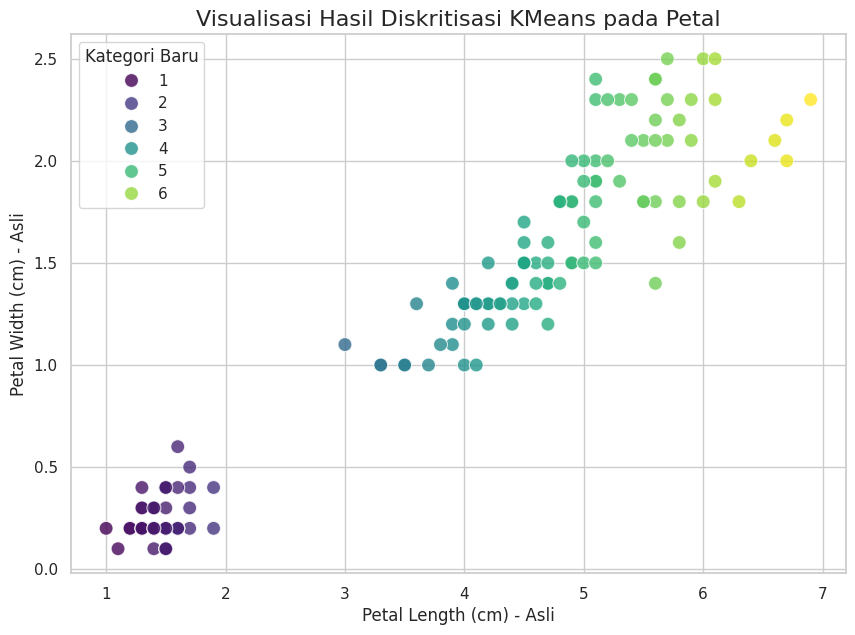

In [25]:
# --- Visualisasi 1: Melihat Batas Klasterisasi KMeans ---
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

print("Visualisasi Batas Kategori pada Fitur Petal (Kelopak)")

plt.figure(figsize=(10, 7))

# Membuat scatter plot
# Sumbu x dan y menggunakan data numerik asli
# Warna (hue) menggunakan data kategori dari hasil diskritisasi
sns.scatterplot(
    x=data_iris['petal_length_cm'],
    y=data_iris['petal_width_cm'],
    hue=data_discretized['petal_length_cm'], # Warna berdasarkan kategori hasil diskritisasi
    palette='viridis', # Skema warna
    s=100, # Ukuran titik
    alpha=0.8 # Transparansi
)

plt.title('Visualisasi Hasil Diskritisasi KMeans pada Petal', fontsize=16)
plt.xlabel('Petal Length (cm) - Asli', fontsize=12)
plt.ylabel('Petal Width (cm) - Asli', fontsize=12)
plt.legend(title='Kategori Baru')
plt.show()

*Plot scatter menunjukkan empat kelompok data yang diidentifikasi oleh KMeans.Kelompok 'A' (warna gelap) memiliki panjang dan lebar petal terkecil, sementara kelompok 'D' (warna terang) memiliki ukuran terbesar, menunjukkan pengelompokan yang jelas dan logis.*

### 5.2. Visualisasi Distribusi Spesies dalam Kategori
Plot ini adalah kunci untuk memahami efektivitas diskritisasi. Kita melihat komposisi spesies dalam setiap kategori yang telah dibuat.

Visualisasi Distribusi Spesies di Dalam Setiap Kategori Baru



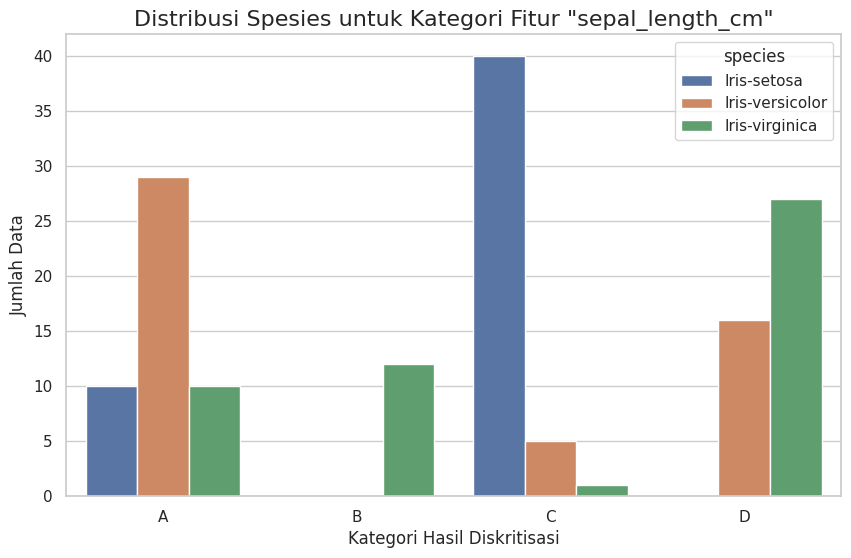

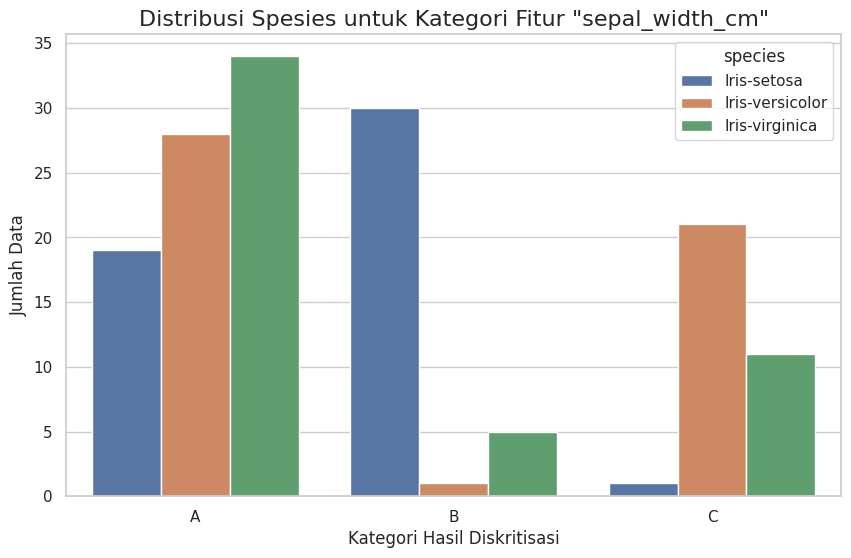

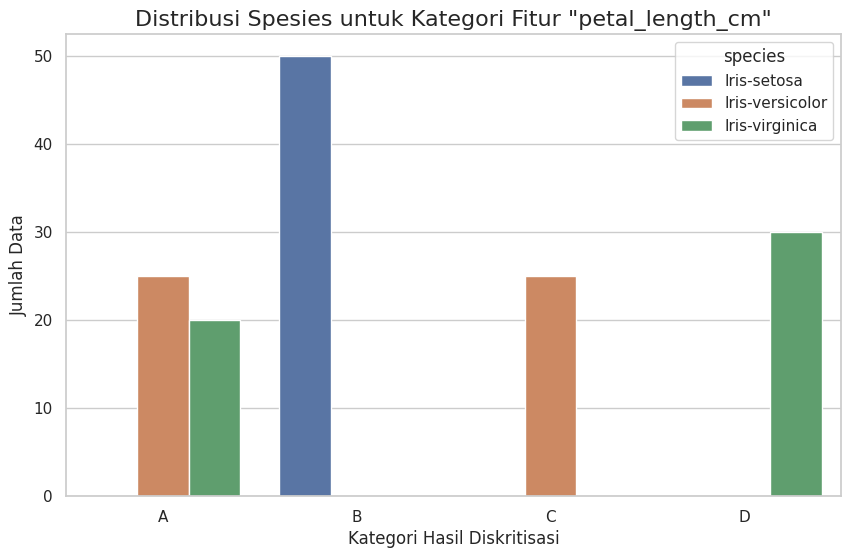

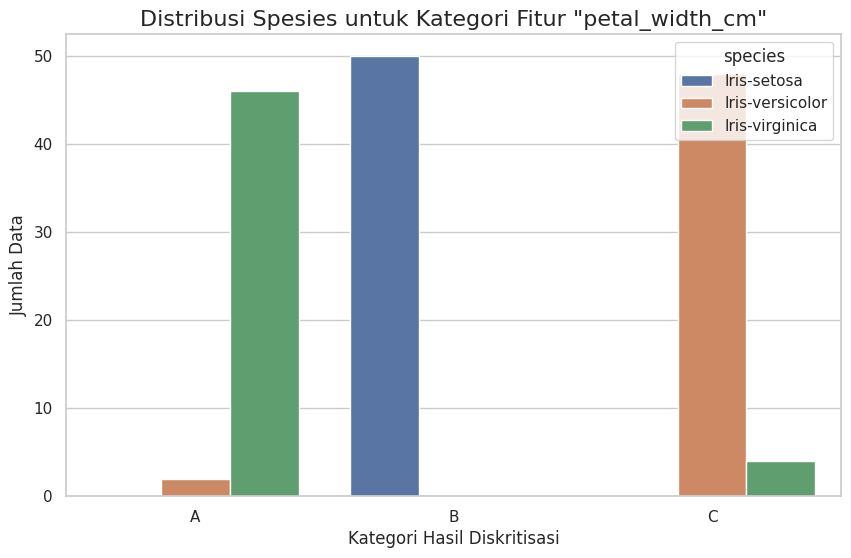

In [29]:
# --- Visualisasi 2: Melihat Distribusi Spesies di Tiap Kategori ---

# Mengambil kembali daftar fitur yang kita diskritisasi
features_to_visualize = discretization_params.keys()

print("Visualisasi Distribusi Spesies di Dalam Setiap Kategori Baru\n")

# Loop untuk membuat plot untuk setiap fitur
for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))

    # Menggunakan countplot dari seaborn untuk kemudahan
    sns.countplot(
        x=data_discretized[feature + '_discrete'], # Sumbu x adalah kategori (A, B, C)
        hue=data_discretized['species'], # Warna dibedakan berdasarkan spesies
        order=sorted(data_discretized[feature + '_discrete'].unique()) # Mengurutkan kategori (A, B, C)
    )

    plt.title(f'Distribusi Spesies untuk Kategori Fitur "{feature}"', fontsize=16)
    plt.xlabel('Kategori Hasil Diskritisasi', fontsize=12)
    plt.ylabel('Jumlah Data', fontsize=12)
    plt.show()

*Dari serangkaian diagram batang, terlihat jelas bahwa kategori yang dibuat sangat berkorelasi dengan spesies. Contoh paling signifikan ada pada `petal_length_cm`, di mana Kategori 'A' secara eksklusif berisi spesies `Iris-setosa`. Ini secara visual membuktikan mengapa model klasifikasi dapat dengan mudah mencapai akurasi tinggi bahkan setelah data didiskritisasi.*